In [73]:
import cv2
import numpy as np
import os
import statistics
import matplotlib as plt
# Load the resized picture and mask
#picture = cv2.imread(r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Blue_vail")

In [29]:
import cv2
import numpy as np
import os

def measure_blue_veil(image):
    height_picture, width_picture, _ = image.shape
    total_pixels = height_picture * width_picture
    count = 0

    for y in range(height_picture):
        for x in range(width_picture):
            b_picture = float(image[y, x][0])  # Blue channel value
            g_picture = float(image[y, x][1])  # Green channel value
            r_picture = float(image[y, x][2])  # Red channel value

            total = r_picture + g_picture + b_picture

            if b_picture > 60 and (r_picture - 46 < g_picture) and (g_picture < r_picture + 15):
                count += 1
    return count

    #if count > 2900:
        #return 1
    #else:
        #return 0

# Directories containing the pictures
directory1 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory2 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
blue_veil = []
no_blue_veil= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_blue_veil(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory1, blue_veil)

# Process the second directory
process_directory(directory2, no_blue_veil)

# Print the results
print("Results from directory 1:", blue_veil)
print("Results from directory 2:", no_blue_veil)


Results from directory 1: [4731, 943, 4623, 6015, 1401, 3895, 7070, 13902, 618, 1818, 4023, 165, 12, 5043, 403, 10861, 7558, 1121, 90, 501, 11683, 5335, 7715, 1, 1697, 2588, 142, 1630, 2, 2316, 27, 334, 240, 61, 2, 11046, 23, 1964, 3794, 1028, 1870, 362, 9647, 9474, 2910]
Results from directory 2: [57741, 2563, 30, 228, 237, 3279, 1465, 7722, 12, 3966, 1616, 1537, 928, 6553, 1383, 23, 0, 55, 3967, 11425, 16506, 3483, 1980, 2407, 3648, 22252, 3847, 879, 4214, 18, 3961, 12162, 278, 7792, 2717, 1761, 4, 9046, 3392, 35, 65378, 2544, 87, 2978, 1030]


In [30]:
# Calculate the means
mean_results1 = np.mean(blue_veil)
mean_results2 = np.mean(no_blue_veil)
standart_devresult1 = round(statistics.stdev(blue_veil),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_blue_veil),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Blue Veil):", rounded_mean_results1)
print("Mean of results2 (No Blue Veil):", rounded_mean_results2)


The standart deviation of blue veil is : 3805.62
The standart deviation of no  blue veil is : 12945.89
Mean of results1 (Blue Veil): 3348.53
Mean of results2 (No Blue Veil): 6158.42


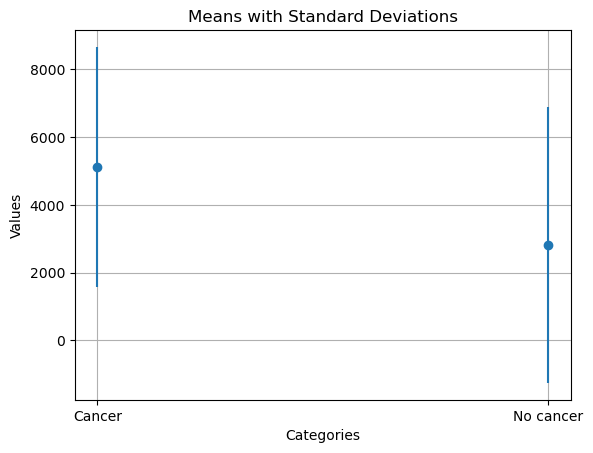

In [32]:
import matplotlib.pyplot as plt

# Data
means = [5121.57, 2824.19]
std_devs = [3537.75, 4076.61]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()


In [36]:
# Find the minimum value in results1 (blue veil)
min_value_results1 = min(results1)

# Print the minimum value
print("Minimum value in results1 (Blue Veil):", min_value_results1)


Minimum value in results1 (Blue Veil): 165


In [11]:
def measure_pigment_network(image): #feature 1
    
    # Convert the image to the LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract the L, A, and B channels from the LAB image
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply contrast stretching to enhance the L channel
    enhanced_l_channel = cv2.equalizeHist(l_channel)

    # Perform thresholding on the enhanced L channel to obtain a binary mask
    _, binary_mask = cv2.threshold(enhanced_l_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and refine the binary mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morphological_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Convert the morphological mask to a color image
    color_mask = cv2.cvtColor(morphological_mask, cv2.COLOR_GRAY2BGR)

    # Combine the color mask with the original image to highlight the regions of interest
    result = cv2.bitwise_and(image, color_mask)

    # Calculate the percentage of pigment network coverage
    total_pixels = np.prod(binary_mask.shape[:2])
    pigment_pixels = np.count_nonzero(binary_mask)
    coverage_percentage = (pigment_pixels / total_pixels) * 100

    #print("Pigment Network Coverage: {:.2f}%".format(coverage_percentage))
    #if coverage_percentage > 50:
        #return 1
    #else:
        #return 0
    return coverage_percentage

In [64]:
# Directories containing the pictures

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_pigment_network(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)


Results from directory 3: [5.39703369140625, 8.7371826171875, 5.3863525390625, 10.67962646484375, 14.0869140625, 12.10784912109375, 7.80181884765625, 17.37060546875, 5.72662353515625, 6.7108154296875, 10.83526611328125, 8.37860107421875, 11.8133544921875, 15.948486328125, 10.9344482421875, 11.26556396484375, 8.97369384765625, 1.4678955078125, 3.55377197265625, 2.935791015625, 14.5538330078125, 8.29620361328125, 18.04046630859375, 8.54339599609375, 1.92108154296875, 6.0546875, 2.47039794921875, 13.09356689453125, 10.4339599609375, 6.6131591796875, 5.15899658203125, 4.72412109375, 6.73675537109375, 16.30096435546875, 5.71136474609375, 11.43035888671875, 7.20367431640625, 2.58636474609375, 4.89959716796875, 2.94647216796875, 2.4627685546875, 4.791259765625, 10.49041748046875, 12.73040771484375, 7.56072998046875]
Results from directory 4: [50.22430419921875, 3.4027099609375, 2.1484375, 49.25994873046875, 6.9793701171875, 3.77197265625, 5.9722900390625, 8.02764892578125, 2.77252197265625, 1

In [65]:
# Calculate the means
mean_results1 = np.mean(pigment_network)
mean_results2 = np.mean(no_pigment_network)
standart_devresult1 = round(statistics.stdev(pigment_network),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_pigment_network),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Cancer):", rounded_mean_results1)
print("Mean of results2 (No cancer):", rounded_mean_results2)

The standart deviation of blue veil is : 4.39
The standart deviation of no  blue veil is : 12.04
Mean of results1 (Cancer): 8.35
Mean of results2 (No cancer): 9.46


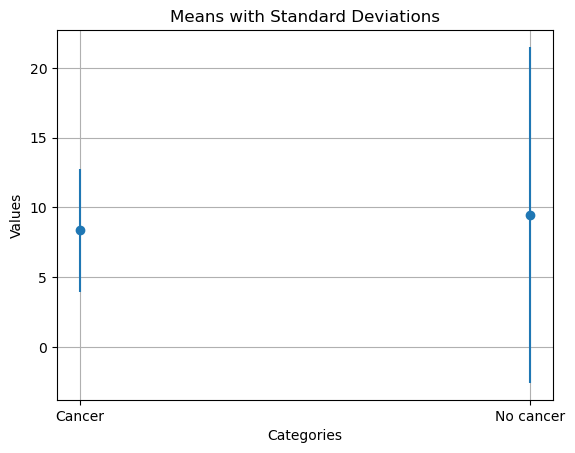

In [66]:
import matplotlib.pyplot as plt

# Data
means = [mean_results1, mean_results2]
std_devs = [standart_devresult1, standart_devresult2]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()

In [39]:
def measure_irregular_pigmentation(image): #feature 6
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to create a binary image
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    
    # Label connected components in the binary image
    labeled_image = label(binary)
    
    # Initialize lists to store irregular pigmentation regions' coordinates
    min_rows, min_cols, max_rows, max_cols = [], [], [], []
    
    # Iterate through each labeled region
    for region in regionprops(labeled_image):
        # Calculate the area and perimeter of the region
        area = region.area
        perimeter = region.perimeter
        
        # Calculate the circularity of the region
        circularity = 4 * 3.1415 * (area / (perimeter ** 2))
        
        # Check if the region is irregular based on circularity threshold
        if circularity < 0.6:
            # Get the bounding box coordinates of the region
            min_row, min_col, max_row, max_col = region.bbox
            
            # Store the coordinates of the irregular pigmentation region
            min_rows.append(min_row)
            min_cols.append(min_col)
            max_rows.append(max_row)
            max_cols.append(max_col)
    
    # Convert the image to the LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract the L channel from the LAB image
    l_channel = lab_image[:, :, 0]

    # Apply adaptive thresholding to create a binary mask
    _, binary_mask = cv2.threshold(l_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Calculate the percentage of irregular pigmentation coverage
    total_pixels = np.prod(binary_mask.shape[:2])
    irregular_pixels = np.count_nonzero(binary_mask)
    coverage_percentage = (irregular_pixels / total_pixels) * 100

    #print("Irregular Pigmentation Coverage: {:.2f}%".format(coverage_percentage))
    #if coverage_percentage > 50:
        #return 1
    ##else:
       # return 0
    return coverage_percentage

In [42]:
# Directories containing the pictures
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_irregular_pigmentation(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)

Results from directory 3: [7.50885009765625, 12.73651123046875, 7.7056884765625, 15.90728759765625, 20.69091796875, 18.1549072265625, 11.09771728515625, 25.64697265625, 8.27178955078125, 9.3109130859375, 15.5548095703125, 12.30926513671875, 17.17987060546875, 17.77191162109375, 15.7867431640625, 16.53594970703125, 12.84637451171875, 1.99737548828125, 4.901123046875, 4.28924560546875, 21.2310791015625, 11.7889404296875, 19.00482177734375, 12.11395263671875, 2.587890625, 8.73260498046875, 3.67889404296875, 19.14215087890625, 15.22216796875, 9.5489501953125, 7.60498046875, 6.915283203125, 6.95648193359375, 23.5809326171875, 8.45794677734375, 16.973876953125, 10.137939453125, 3.851318359375, 7.36846923828125, 4.02984619140625, 3.509521484375, 6.6680908203125, 14.95819091796875, 18.26934814453125, 10.24169921875]
Results from directory 4: [94.83184814453125, 5.08270263671875, 3.05938720703125, 56.74591064453125, 8.514404296875, 5.00946044921875, 8.5052490234375, 11.77520751953125, 3.8070678

C:\Users\45911\AppData\Local\Temp\ipykernel_22868\3703556543.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  circularity = 4 * 3.1415 * (area / (perimeter ** 2))


In [43]:
# Calculate the means
mean_results1 = np.mean(pigment_network)
mean_results2 = np.mean(no_pigment_network)
standart_devresult1 = round(statistics.stdev(pigment_network),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_pigment_network),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Cancer):", rounded_mean_results1)
print("Mean of results2 (No cancer):", rounded_mean_results2)

The standart deviation of blue veil is : 6.05
The standart deviation of no  blue veil is : 18.26
Mean of results1 (Cancer): 11.75
Mean of results2 (No cancer): 13.58


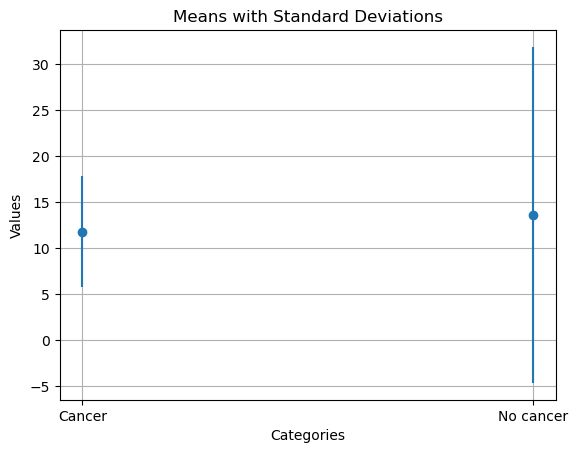

In [44]:
import matplotlib.pyplot as plt

# Data
means = [rounded_mean_results1, rounded_mean_results2]
std_devs = [standart_devresult1, standart_devresult2]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()


In [47]:
from skimage import color, exposure
def measure_vascular(image):
    red_channel = image[:, :, 0]
    enhanced_red_channel = exposure.adjust_gamma(red_channel, gamma=1)
    enhanced_image = image.copy()
    enhanced_image[:, :, 0] = enhanced_red_channel
    hsv_img = color.rgb2hsv(enhanced_image)

    lower_red1 = np.array([0, 40/100, 00/100])
    upper_red1 = np.array([25/360, 1, 1])
    mask1 = np.logical_and(np.all(hsv_img >= lower_red1, axis=-1), np.all(hsv_img <= upper_red1, axis=-1))

    lower_red2 = np.array([330/360, 40/100, 00/100])  # Lower limit for red hue, saturation, and value
    upper_red2 = np.array([1, 1, 1])  # Upper limit for red hue, saturation, and value
    mask2 = np.logical_and(np.all(hsv_img >= lower_red2, axis=-1), np.all(hsv_img <= upper_red2, axis=-1))

    mask = np.logical_or(mask1, mask2)

    return np.sum(mask) 

In [48]:
# Directories containing the pictures
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_vascular(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)

Results from directory 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Results from directory 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [49]:
# Calculate the means
mean_results1 = np.mean(pigment_network)
mean_results2 = np.mean(no_pigment_network)
standart_devresult1 = round(statistics.stdev(pigment_network),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_pigment_network),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Cancer):", rounded_mean_results1)
print("Mean of results2 (No cancer):", rounded_mean_results2)

The standart deviation of blue veil is : 1.0
The standart deviation of no  blue veil is : 0.0
Mean of results1 (Cancer): 0.2
Mean of results2 (No cancer): 0.04


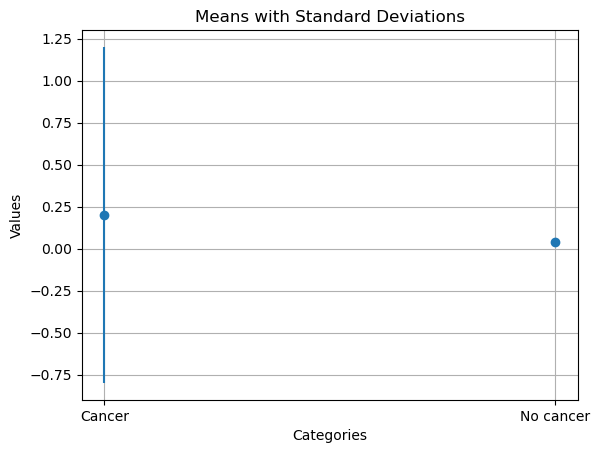

In [50]:
import matplotlib.pyplot as plt

# Data
means = [rounded_mean_results1, rounded_mean_results2]
std_devs = [standart_devresult1, standart_devresult2]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()


In [53]:
from skimage.color import rgb2gray
from skimage.feature import blob_log
from math import sqrt

def measure_globules(image):
    image_gray = rgb2gray(image)
    inverted_image = 1 - image_gray

    blobs_doh = blob_log(inverted_image, min_sigma=1, max_sigma=4, num_sigma=50, threshold=.05)
    blobs_doh[:, 2] = blobs_doh[:, 2] * sqrt(2)
    blob_amount = len(blobs_doh)

    return blob_amount


In [54]:
# Directories containing the pictures
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_globules(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)

Results from directory 3: [91, 52, 118, 240, 65, 50, 89, 218, 46, 184, 180, 70, 147, 213, 53, 69, 85, 19, 25, 24, 192, 59, 247, 47, 26, 48, 28, 103, 60, 41, 112, 42, 53, 66, 52, 82, 129, 33, 50, 39, 30, 27, 63, 76, 52]
Results from directory 4: [61, 41, 21, 9, 55, 49, 132, 131, 34, 115, 20, 25, 26, 68, 42, 33, 43, 77, 41, 97, 76, 39, 20, 49, 85, 76, 80, 61, 98, 30, 64, 88, 113, 41, 42, 30, 13, 176, 62, 29, 36, 29, 93, 58, 32]


In [55]:
# Calculate the means
mean_results1 = np.mean(pigment_network)
mean_results2 = np.mean(no_pigment_network)
standart_devresult1 = round(statistics.stdev(pigment_network),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_pigment_network),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Cancer):", rounded_mean_results1)
print("Mean of results2 (No cancer):", rounded_mean_results2)

The standart deviation of blue veil is : 62.37
The standart deviation of no  blue veil is : 36.04
Mean of results1 (Cancer): 84.33
Mean of results2 (No cancer): 58.67


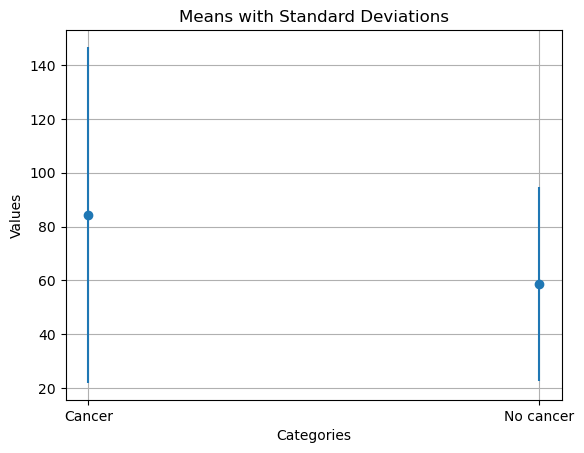

In [56]:
import matplotlib.pyplot as plt

# Data
means = [rounded_mean_results1, rounded_mean_results2]
std_devs = [standart_devresult1, standart_devresult2]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()


In [60]:
from skimage import color, exposure
def measure_blue(image):
    red_channel = image[:, :, 0]
    enhanced_red_channel = exposure.adjust_gamma(red_channel, gamma=1)
    enhanced_image = image.copy()
    enhanced_image[:, :, 0] = enhanced_red_channel
    hsv_img = color.rgb2hsv(enhanced_image)

    lower_red1 = np.array([240/360, 40/100, 0/100])
    upper_red1 = np.array([300/360, 1, 1])
    mask = np.logical_and(np.all(hsv_img >= lower_red1, axis=-1), np.all(hsv_img <= upper_red1, axis=-1))

    

    

    return np.sum(mask) 

In [61]:
# Directories containing the pictures
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_blue(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)

Results from directory 3: [7, 64, 97, 231, 22, 1213, 18, 1192, 11, 1138, 407, 52, 6113, 177, 2300, 2, 145, 0, 170, 822, 24, 29, 60, 138, 0, 1, 3, 4045, 1201, 2830, 7, 21, 14, 41, 21, 21, 139, 143, 5, 19, 12, 7, 14, 12, 1]
Results from directory 4: [1, 0, 5, 0, 980, 0, 9, 0, 8, 10, 25, 8, 5, 15, 4, 6, 72, 10655, 0, 0, 16, 1, 0, 0, 1, 0, 739, 141, 1, 24, 7, 129, 7, 4, 0, 3, 0, 0, 68, 65, 0, 2, 1176, 93, 14]


In [62]:
# Calculate the means
mean_results1 = np.mean(pigment_network)
mean_results2 = np.mean(no_pigment_network)
standart_devresult1 = round(statistics.stdev(pigment_network),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_pigment_network),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Cancer):", rounded_mean_results1)
print("Mean of results2 (No cancer):", rounded_mean_results2)

The standart deviation of blue veil is : 1186.82
The standart deviation of no  blue veil is : 612.3
Mean of results1 (Cancer): 510.87
Mean of results2 (No cancer): 317.64


C:\Users\45911\anaconda3\lib\fractions.py:394: RuntimeWarning: overflow encountered in long_scalars
  return Fraction(a.numerator * db - b.numerator * da,


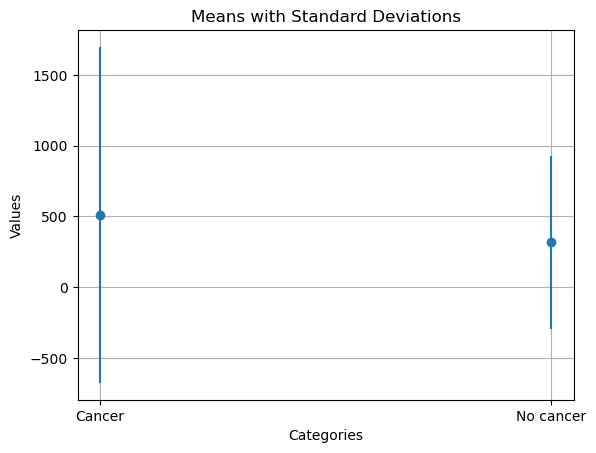

In [63]:
import matplotlib.pyplot as plt

# Data
means = [rounded_mean_results1, rounded_mean_results2]
std_devs = [standart_devresult1, standart_devresult2]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()

In [80]:
def asymmetry_analysis(images):
    asymmetry_features = []
    for img in images:
        # Convert to grayscale if necessary
        if img.ndim == 3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img

        # Threshold the image
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Get the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        # Create a mask for the contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, -1)
        # Get the region of interest (ROI)
        roi = cv2.bitwise_and(gray, mask)
        # Find the horizontal and vertical axis of the ROI
        contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

        cnt = contours[0]
        (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
        if angle > 90:
            angle = angle - 90
        else:
            angle = angle + 90
        # Rotate the ROI to align the axis
        M = cv2.getRotationMatrix2D((x,y),angle,1)
        rotated_roi = cv2.warpAffine(roi,M,(roi.shape[1],roi.shape[0]))
        # Compute the asymmetry feature
        asymmetry = np.sum(np.abs(roi - rotated_roi)) / np.sum(roi)
        asymmetry_features.append(asymmetry)
    return asymmetry



In [81]:
# Directories containing the pictures
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = asymmetry_analysis(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)

C:\Users\45911\AppData\Local\Temp\ipykernel_22868\2631394035.py:34: RuntimeWarning: invalid value encountered in ulong_scalars
  asymmetry = np.sum(np.abs(roi - rotated_roi)) / np.sum(roi)


Results from directory 3: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Results from directory 4: [nan, nan, nan, 1.003969981814922, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.9942228269951539, nan, nan, nan, nan]


In [89]:
def get_texture_features(img_folder):
    contrast = []
    correlation = []
    energy = []
    homogeneity = []
    haralick = []
    
    with os.scandir(img_folder) as entries:
        for entry in entries:
            if entry.name.endswith('.png') and entry.is_file():
                img_path = os.path.join(img_folder, entry.name)
                img = io.imread(img_path, as_gray=True)
                
                # Get GLCM texture features
                img_int = (img * 255).astype(np.uint8)

                glcm = skimage.feature.graycomatrix(img_int, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
                contrast.append(skimage.feature.graycoprops(glcm, 'contrast')[0, 0])
                correlation.append(skimage.feature.graycoprops(glcm, 'correlation')[0, 0])
                energy.append(skimage.feature.graycoprops(glcm, 'energy')[0, 0])
                homogeneity.append(skimage.feature.graycoprops(glcm, 'homogeneity')[0, 0])
    
    return contrast

#contrast, correlation, energy, homogeneity = get_texture_features(resized_images_path)



In [91]:
# Directories containing the pictures
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = get_texture_features(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory3, pigment_network)

# Process the second directory
process_directory(directory4, no_pigment_network)

# Print the results
print("Results from directory 3:",pigment_network )
print("Results from directory 4:", no_pigment_network)

C:\Users\45911\AppData\Local\Temp\ipykernel_22868\4093742746.py:8: DeprecationWarning: scandir: path should be string, bytes, os.PathLike or None, not ndarray
  with os.scandir(img_folder) as entries:


ValueError: scandir: embedded null character in path

In [ ]:
directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"
# Lists to store the results
cancer = []
no_cancer = []

In [ ]:
def 

In [96]:
def calculate_stats(list_cancer,list_no_cancer):
    # Calculate the means
    mean_cancer = np.mean(list_cancer)
    mean_no_cancer = np.mean(list_no_cancer)
    standart_devresult1 = round(statistics.stdev(list_cancer),2)
    print(f"The standart deviation of a feature , cancer is : {standart_devresult1}")
    standart_devresult2 = round(statistics.stdev(list_no_cancer),2)
    print(f"The standart deviation of no cancer  is : {standart_devresult2}")
    # Round the means to 2 decimal places
    rounded_mean_results1 = round(mean_results1, 2)
    rounded_mean_results2 = round(mean_results2, 2)


    # Print the rounded means
    print("Mean of results1 (Cancer):", rounded_mean_results1)
    print("Mean of results2 (No cancer):", rounded_mean_results2)
    return rounded_mean_results1, rounded_mean_results2,standart_devresult1,standart_devresult2

In [97]:
def make_plot(rounded_mean_results1,rounded_mean_results2,standart_devresult1,standart_devresult2):
    means = [rounded_mean_results1, rounded_mean_results2]
    std_devs = [standart_devresult1, standart_devresult2]
    categories = ['Cancer', 'No cancer']

    # Plotting
    plt.errorbar(categories, means, yerr=std_devs, fmt='o')
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Means with Standard Deviations')
    plt.grid(True)

    # Display the plot
    plt.show()